Accuracy: 0.7402597402597403
Best Params: {'max_depth': 8, 'n_estimators': 156}


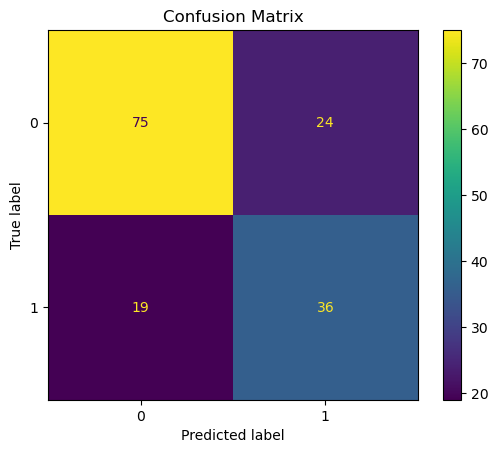

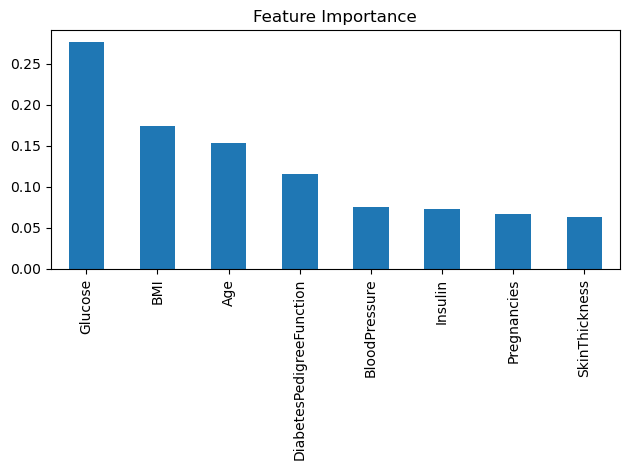

In [1]:
# Assignment No: 06 - Random Forest on Diabetes Dataset

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("diabetes.csv")

# Features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Prediction and accuracy
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Hyperparameter tuning
param_dist = {'n_estimators': randint(50, 200), 'max_depth': randint(2, 10)}
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, random_state=42)
rand_search.fit(X_train, y_train)

# Best model evaluation
best_rf = rand_search.best_estimator_
print("Best Params:", rand_search.best_params_)
y_pred_best = best_rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.show()

# Feature importance
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot.bar(title="Feature Importance")
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load dataset
df = pd.read_csv("diabetes.csv")

# Prepare features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train Random Forest model
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall   : {recall_score(y_test, y_pred):.2f}")


Accuracy : 0.79
Precision: 0.66
Recall   : 0.62
